## Project Name:Bank Marketing Data Analysis 

### Project Type:Supervised Machine Learning Model using Classification

#### Intoduction about Data set of Project:

#### Main Goal of Our Project:

## Step 1:Problem Statement

## Step 2:Data Gathering 

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# for checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for handling class imbalance
from imblearn.over_sampling import SMOTE

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures

# for model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB


# Model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

# for performance metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, log_loss, precision_score, f1_score, recall_score, auc, roc_curve

# data storing libraries
import json
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank_dataset.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Step 3:Exploratory Data Analysis

In [3]:
#All details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#summarizing statistical data of dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
print("Row count -->",df.shape[0])
print("coulmn count -->",df.shape[1])

Row count --> 45211
coulmn count --> 17


##### Analysis Of Target column

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

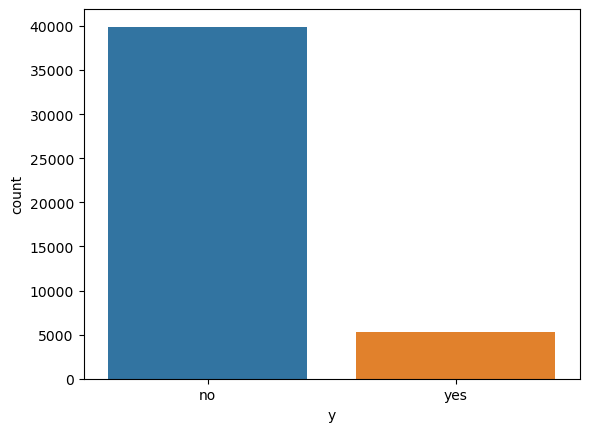

In [7]:
#visualization of target column
sns.countplot(df['y'])

##### checking Missing values in our data

In [8]:
#null values-NAN
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# KNN_Imputer function for imputing NaN values in df,
# so convert first all missing values into NaN & in numerical format

def knn_imputer(df):
    """KNN_Imputer function for imputing NaN values in df """
    knn_imputer = KNNImputer(n_neighbors=5)
    array = knn_imputer.fit_transform(df)

    df = pd.DataFrame(array,index=df.index, columns=df.columns)
    return df

##### Checking Duplicate Rows in our dataset

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## 1. age

In [12]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [13]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

## 2. job

In [14]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
# Here Catagorical data is nominal and efficiently converting 
# into numerical by One-Hot encoding
df=pd.get_dummies(df,columns=['job'])
df.head(2)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0


## 3. marital

In [17]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
dict(df['marital'].value_counts())

{'married': 27214, 'single': 12790, 'divorced': 5207}

In [19]:
# Here Catagorical data is nominal and efficiently converting 
# into numerical by One-Hot encoding
df=pd.get_dummies(df,columns=['marital'])
df.head(2)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1


## 4. education

In [20]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
dict(df['education'].value_counts())

{'secondary': 23202, 'tertiary': 13301, 'primary': 6851, 'unknown': 1857}

In [22]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['education'].replace({'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0}, inplace=True)

## 5. default

In [23]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
dict(df['default'].value_counts())

{'no': 44396, 'yes': 815}

In [25]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['default'].replace({'no': 0, 'yes': 1}, inplace=True)

## 6. balance

In [26]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [27]:
(df['balance'].value_counts())

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

## 7. housing

In [28]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [29]:
dict(df['housing'].value_counts())

{'yes': 25130, 'no': 20081}

In [30]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['housing'].replace({'no': 0, 'yes': 1}, inplace=True)

## 8. loan

In [31]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
dict(df['loan'].value_counts())

{'no': 37967, 'yes': 7244}

In [33]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['loan'].replace({'no': 0, 'yes': 1}, inplace=True)

## 9. contact

In [34]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [35]:
dict(df['contact'].value_counts())

{'cellular': 29285, 'unknown': 13020, 'telephone': 2906}

In [36]:
# Here Catagorical data is nominal and efficiently converting 
# into numerical by One-Hot encoding
df=pd.get_dummies(df,columns=['contact'])
df.head(2)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,may,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,may,151,1,...,0,1,0,0,0,0,1,0,0,1


## 10. day

In [37]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [38]:
(df['day'].value_counts())

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

## 11. month

In [39]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [40]:
dict(df['month'].value_counts())

{'may': 13766,
 'jul': 6895,
 'aug': 6247,
 'jun': 5341,
 'nov': 3970,
 'apr': 2932,
 'feb': 2649,
 'jan': 1403,
 'oct': 738,
 'sep': 579,
 'mar': 477,
 'dec': 214}

In [41]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
                     'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}, inplace=True)

## 12. duration

In [42]:
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [43]:
(df['duration'].value_counts())

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

## 13. campaign

In [44]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [45]:
(df['campaign'].value_counts())

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

## 14. pdays

In [46]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [47]:
(df['pdays'].value_counts())

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

## 15. previous

In [48]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [49]:
(df['previous'].value_counts())

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

## 16. poutcome

In [50]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [51]:
(df['poutcome'].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [52]:
"""poutcome represents the outcome of the previous campaign, and more than 85% of this is unknown, 
there is no way we can know what happened last time and it is not appropriate to replace the majority 
unknown by values derived from minority known, so we need to drop this column"""

df.drop(columns='poutcome',inplace=True)

## 17. y (Target Feature)

In [53]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [54]:
dict(df['y'].value_counts())

{'no': 39922, 'yes': 5289}

In [55]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical by label encoding
df['y'].replace({'no': 0, 'yes': 1}, inplace=True)

# ------------------------------------------------------------------------------------------------------

# Step 4: Feature Engineering

In [56]:
# 1. Function for Outlier Detection by giving column name as argument

def detect_outlier(column):
    """IQR Method is used to detect Outliers and also finding the other parameters: 
           q1, q2, q3, mean, median, uppertail, lowertail, useful_data, outliers"""
    
    print('Boxplot before imputation:')
    sns.boxplot(x= df[column])
    plt.show(close=None)
    
    global q1,q2,q3,uppertail,lowertail,good_data,outliers 
        # so we can use them outside into the impute function

    q1= df[column].quantile(.25)
    q2= df[column].quantile(.50)
    q3= df[column].quantile(.75)
    IQR= q3-q1
    uppertail= q3 + 1.5 * IQR
    lowertail= q1 - 1.5 * IQR

    good_data = df.loc[(df[column] <= uppertail) & 
                       (df[column] >= lowertail),column]  # use 'and' condition for good data
    
    outliers = df.loc[(df[column] > uppertail) | 
                      (df[column] < lowertail),  column]  # use 'or' condition for outliers
    
    print("Outliers:\n",outliers)
    print('--------'*10)
    print(f"Other Parameters from good-data of feature '{column}':")
    print("1. Maximum value:",good_data.max()); print("2. Minimum value:",good_data.min())
    print("3. Uppertail value:",uppertail)    ; print("4. Lowertail value:",lowertail)
    print("5. Mean value:",good_data.mean())  ; print("6. Median value:",good_data.median())
    print(f"7. For Total datapoints: Q1= {q1}, Q2= {q2}, Q3= {q3}")

In [57]:
# 2. Function for impute the outlier by giving argument column name, 
# upper value for outliers beyond uppertail
# lower value for outliers below lowertail

def impute_outlier(column, upper=None, lower=None):
    
    """Imputing the outliers by max, min, uppertail, lowertail, mean, 
    median of good data(Uppertail to lowertail range) in upper & lower arguments"""
    
    if upper=='max':
        df.loc[(df[column] > uppertail), column] = good_data.max()
    if upper=='uppertail':
        df.loc[(df[column] > uppertail), column] = uppertail
    if upper=='mean':
        df.loc[(df[column] > uppertail), column] = good_data.mean() 
    if upper=='median':
        df.loc[(df[column] > uppertail), column] = good_data.median()
    if lower=='min':
        df.loc[(df[column] < lowertail), column] = good_data.min()
    if lower=='lowertail':
        df.loc[(df[column] < lowertail), column] = lowertail
    if lower=='mean':
        df.loc[(df[column] < lowertail), column] = good_data.mean()     
    if lower=='median':
        df.loc[(df[column] < lowertail), column] = good_data.median()
        
    print('Boxplot After Outlier imputation:')    
    sns.boxplot(x= df[column])
    plt.show(close=None)
    
    outliers1 = df.loc[(df[column] > uppertail) | 
                       (df[column] < lowertail),  column]   # use 'or' condition for outliers
    print("Outliers After Imputation:\n",outliers1)

In [58]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  y                  45211 non-null  int64
 13  job_admin.         45211 non-null  uint8
 14  job_blue-collar    45211 non-null  uint8
 15  job_entrepreneur   45211 non-null  uint8
 16  job_housemaid      45211 non-null  uint8
 17  job_manageme

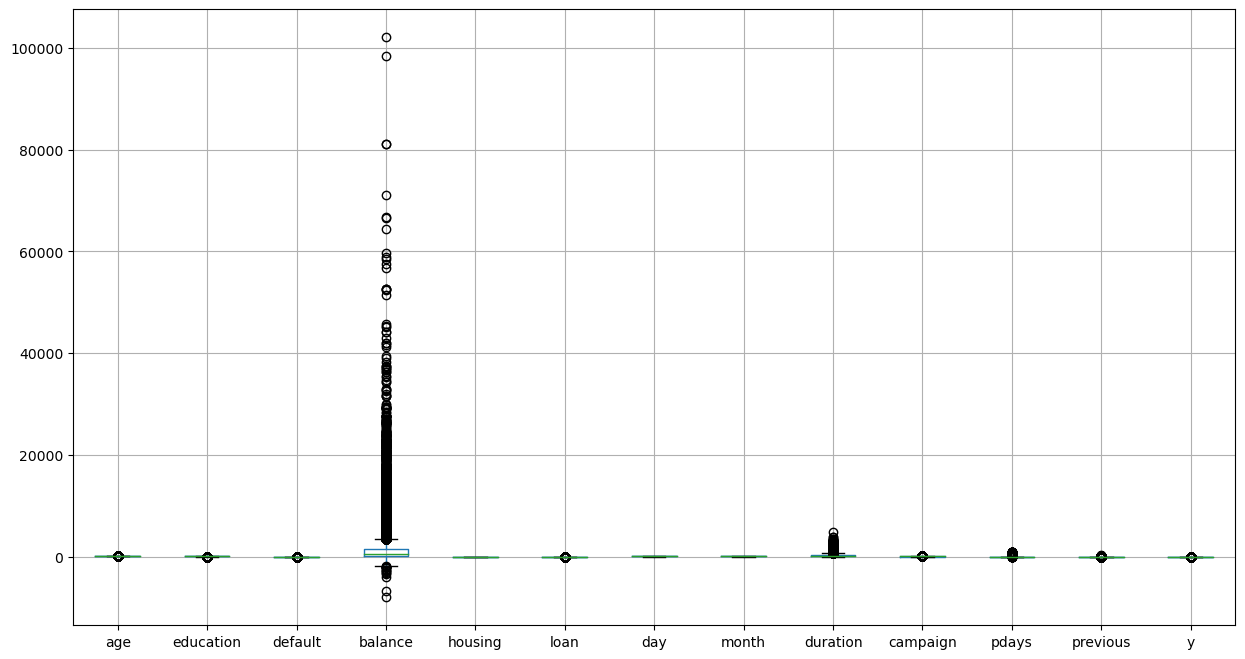

In [60]:
df.loc[:, 'age':'y'].boxplot(figsize=(15,8))
plt.show(close=None)

## 1. age

Boxplot before imputation:


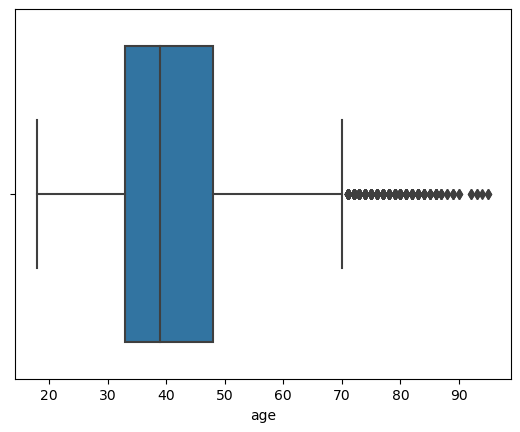

Outliers:
 29158    83
29261    75
29263    75
29322    83
29865    75
         ..
45163    71
45191    75
45204    73
45207    71
45208    72
Name: age, Length: 487, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'age':
1. Maximum value: 70
2. Minimum value: 18
3. Uppertail value: 70.5
4. Lowertail value: 10.5
5. Mean value: 40.545523656202484
6. Median value: 39.0
7. For Total datapoints: Q1= 33.0, Q2= 39.0, Q3= 48.0


In [61]:
detect_outlier('age')

Boxplot After Outlier imputation:


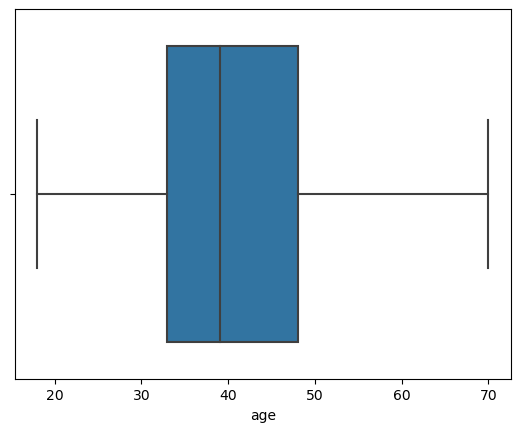

Outliers After Imputation:
 Series([], Name: age, dtype: int64)


In [62]:
impute_outlier('age','max','min')

## 3. education

Boxplot before imputation:


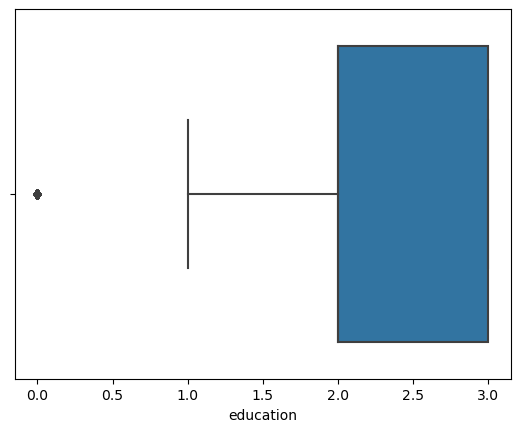

Outliers:
 3        0
4        0
13       0
16       0
42       0
        ..
45129    0
45141    0
45150    0
45158    0
45186    0
Name: education, Length: 1857, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'education':
1. Maximum value: 3
2. Minimum value: 1
3. Uppertail value: 4.5
4. Lowertail value: 0.5
5. Mean value: 2.148775199520229
6. Median value: 2.0
7. For Total datapoints: Q1= 2.0, Q2= 2.0, Q3= 3.0


In [63]:
detect_outlier('education')

In [64]:
# There is no outliers, it is label encoded feature

## 4. default

Boxplot before imputation:


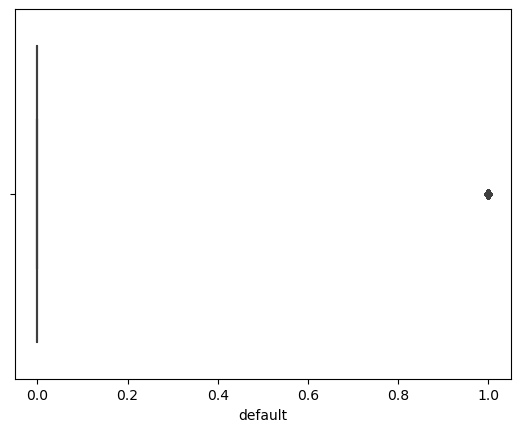

Outliers:
 7        1
79       1
338      1
419      1
458      1
        ..
41562    1
44099    1
44161    1
44302    1
44606    1
Name: default, Length: 815, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'default':
1. Maximum value: 0
2. Minimum value: 0
3. Uppertail value: 0.0
4. Lowertail value: 0.0
5. Mean value: 0.0
6. Median value: 0.0
7. For Total datapoints: Q1= 0.0, Q2= 0.0, Q3= 0.0


In [65]:
detect_outlier('default')

In [66]:
# There is no outliers, it is label encoded feature

## 5. balance

Boxplot before imputation:


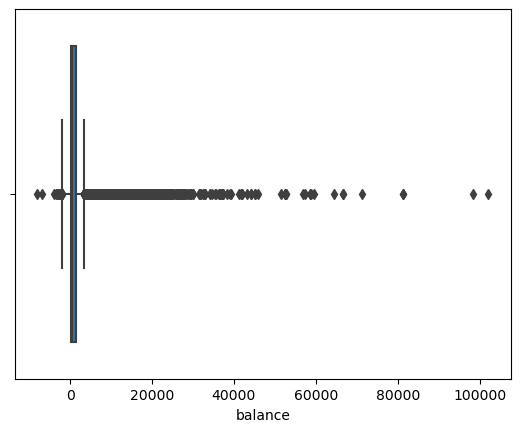

Outliers:
 34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45164     4655
45181     6879
45185     4256
45191     3810
45208     5715
Name: balance, Length: 4729, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'balance':
1. Maximum value: 3462
2. Minimum value: -1944
3. Uppertail value: 3462.0
4. Lowertail value: -1962.0
5. Mean value: 640.6362333876784
6. Median value: 349.0
7. For Total datapoints: Q1= 72.0, Q2= 448.0, Q3= 1428.0


In [67]:
detect_outlier('balance')

In [68]:
# There would be no outliers, these are entries of account balance of person.

## 6. housing

Boxplot before imputation:


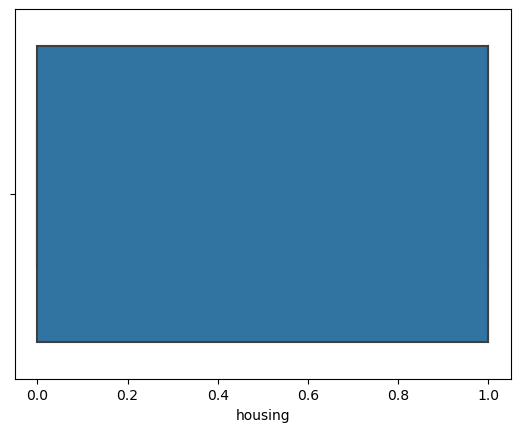

Outliers:
 Series([], Name: housing, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'housing':
1. Maximum value: 1
2. Minimum value: 0
3. Uppertail value: 2.5
4. Lowertail value: -1.5
5. Mean value: 0.5558381809736569
6. Median value: 1.0
7. For Total datapoints: Q1= 0.0, Q2= 1.0, Q3= 1.0


In [69]:
detect_outlier('housing')

In [70]:
# There is no outliers, it is label encoded feature

## 7. loan

Boxplot before imputation:


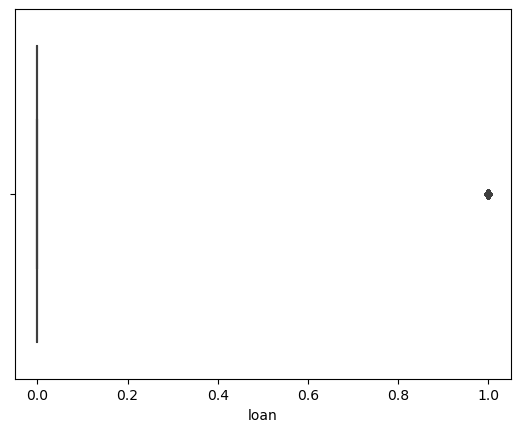

Outliers:
 2        1
6        1
20       1
22       1
24       1
        ..
45122    1
45151    1
45153    1
45194    1
45205    1
Name: loan, Length: 7244, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'loan':
1. Maximum value: 0
2. Minimum value: 0
3. Uppertail value: 0.0
4. Lowertail value: 0.0
5. Mean value: 0.0
6. Median value: 0.0
7. For Total datapoints: Q1= 0.0, Q2= 0.0, Q3= 0.0


In [71]:
detect_outlier('loan')

In [72]:
# There is no outliers, it is label encoded feature

## 9. day

Boxplot before imputation:


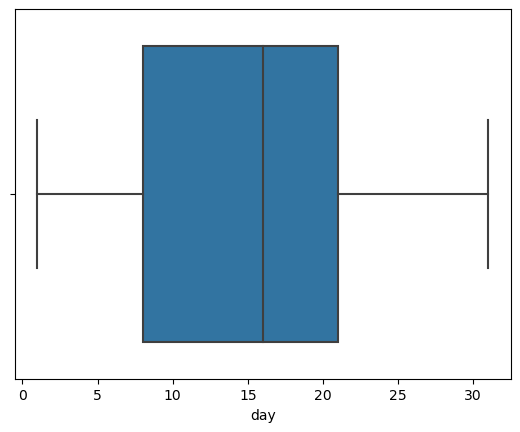

Outliers:
 Series([], Name: day, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'day':
1. Maximum value: 31
2. Minimum value: 1
3. Uppertail value: 40.5
4. Lowertail value: -11.5
5. Mean value: 15.80641879188693
6. Median value: 16.0
7. For Total datapoints: Q1= 8.0, Q2= 16.0, Q3= 21.0


In [73]:
detect_outlier('day')

In [74]:
# There is no outliers.

## 10. month

Boxplot before imputation:


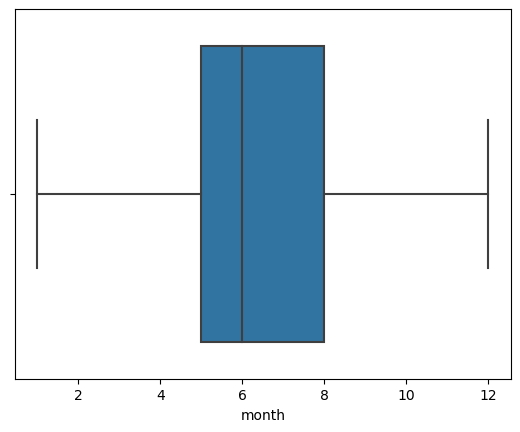

Outliers:
 Series([], Name: month, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'month':
1. Maximum value: 12
2. Minimum value: 1
3. Uppertail value: 12.5
4. Lowertail value: 0.5
5. Mean value: 6.144655061821238
6. Median value: 6.0
7. For Total datapoints: Q1= 5.0, Q2= 6.0, Q3= 8.0


In [75]:
detect_outlier('month')

In [76]:
# There is no outliers, it is label encoded feature

## 11. duration

Boxplot before imputation:


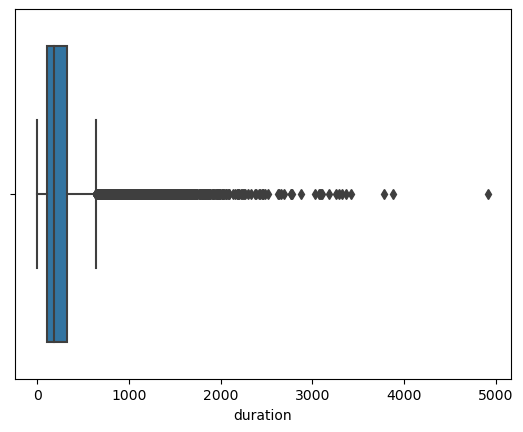

Outliers:
 37       1666
43       1492
53        787
59       1778
61        812
         ... 
45124     701
45199    1166
45200    1556
45206     977
45208    1127
Name: duration, Length: 3235, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'duration':
1. Maximum value: 643
2. Minimum value: 0
3. Uppertail value: 643.0
4. Lowertail value: -221.0
5. Mean value: 203.49094720792834
6. Median value: 167.0
7. For Total datapoints: Q1= 103.0, Q2= 180.0, Q3= 319.0


In [77]:
detect_outlier('duration')

In [78]:
# impute_outlier('duration','max','min')

## 12. campaign

Boxplot before imputation:


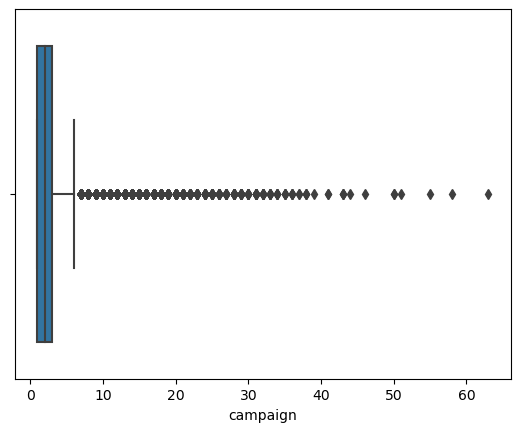

Outliers:
 758       7
780       8
906       7
1103      8
1105      7
         ..
44666     7
44680     9
44770     9
44886    12
45056     7
Name: campaign, Length: 3064, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'campaign':
1. Maximum value: 6
2. Minimum value: 1
3. Uppertail value: 6.0
4. Lowertail value: -2.0
5. Mean value: 2.129949937124825
6. Median value: 2.0
7. For Total datapoints: Q1= 1.0, Q2= 2.0, Q3= 3.0


In [79]:
detect_outlier('campaign')

In [80]:
# impute_outlier('campaign','max','min')

## 13. pdays

Boxplot before imputation:


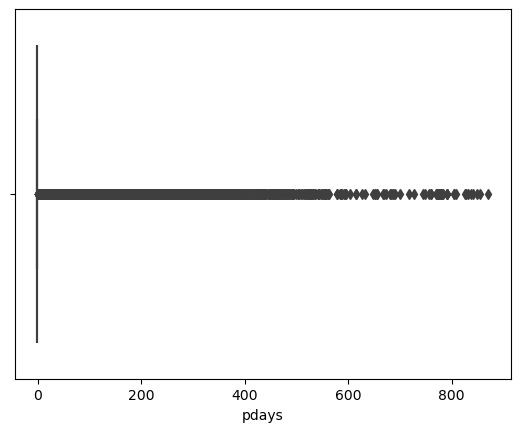

Outliers:
 24060    151
24062    166
24064     91
24072     86
24077    143
        ... 
45199    530
45201    184
45204     40
45208    184
45210    188
Name: pdays, Length: 8257, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'pdays':
1. Maximum value: -1
2. Minimum value: -1
3. Uppertail value: -1.0
4. Lowertail value: -1.0
5. Mean value: -1.0
6. Median value: -1.0
7. For Total datapoints: Q1= -1.0, Q2= -1.0, Q3= -1.0


In [81]:
detect_outlier('pdays')

In [82]:
# impute_outlier('pdays','max','min')

## 14. previous

Boxplot before imputation:


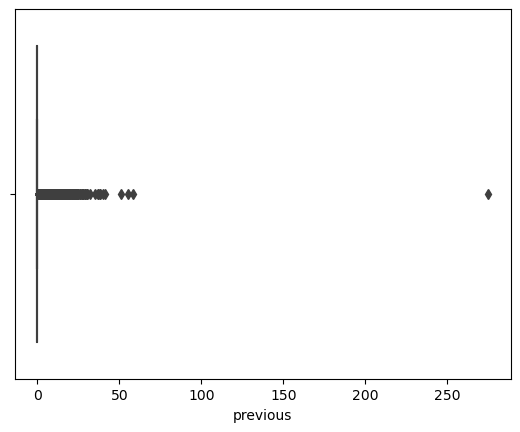

Outliers:
 24060     3
24062     1
24064     4
24072     4
24077     3
         ..
45199    12
45201     4
45204     8
45208     3
45210    11
Name: previous, Length: 8257, dtype: int64
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'previous':
1. Maximum value: 0
2. Minimum value: 0
3. Uppertail value: 0.0
4. Lowertail value: 0.0
5. Mean value: 0.0
6. Median value: 0.0
7. For Total datapoints: Q1= 0.0, Q2= 0.0, Q3= 0.0


In [83]:
detect_outlier('previous')

In [84]:
# impute_outlier('previous','max','min')

###  Sampling & Spliting the Dataset

In [85]:
x=df.drop(['y'], axis=1)
y=df['y']

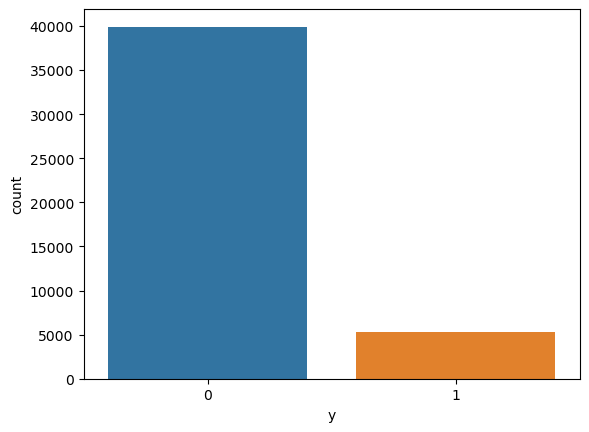

In [86]:
# plot of target feature values
# If data is significantly unbalanced then use SMOTE Sampling

sns.countplot(x = df['y'])
plt.show()

In [87]:
# smt = SMOTE(k_neighbors=8, sampling_strategy=.2)  # minority/majority = 1
# x, y = smt.fit_resample(x,y)
# x.value_counts()

In [88]:
# y.value_counts()

In [89]:
# # plot of target feature values after SMOTE Sampling

# sns.countplot(x = y)
# plt.show()

## Scalling for KNN Algorithm

In [90]:
scale_features=['age', 'education', 'balance', 'day',
                'month', 'duration', 'campaign', 'pdays', 'previous']

##### 1.standrdization

In [91]:
x_std = df.drop("y", axis=1)
x_std

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,...,0,1,0,0,0,1,0,1,0,0
45207,70,1,0,1729,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
45208,70,2,0,5715,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


In [92]:
# Standardization Method-1 (Short & easy steps)

std_scaler = StandardScaler()

x_std[scale_features]=std_scaler.fit_transform(x_std[scale_features]) #only select features which to be scale down
x_std

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,1.651055,1.206484,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,...,0,0,0,0,0,1,0,0,0,1
1,0.302248,-0.077715,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,...,0,1,0,0,0,0,1,0,0,1
2,-0.757528,-0.077715,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,...,0,0,0,0,0,1,0,0,0,1
3,0.591279,-2.646114,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,...,0,0,0,0,0,1,0,0,0,1
4,-0.757528,-2.646114,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.976652,1.206484,0,-0.176460,0,0,0.143418,2.016333,2.791329,0.076230,...,0,1,0,0,0,1,0,1,0,0
45207,2.807175,-1.361914,0,0.120447,0,0,0.143418,2.016333,0.768224,-0.246560,...,0,0,0,0,1,0,0,1,0,0
45208,2.807175,-0.077715,0,1.429593,0,0,0.143418,2.016333,3.373797,0.721811,...,0,0,0,0,0,1,0,1,0,0
45209,1.554712,-0.077715,0,-0.228024,0,0,0.143418,2.016333,0.970146,0.399020,...,0,0,0,0,0,1,0,0,1,0


# 2.Normalization

In [93]:
x_norm = df.drop("y", axis=1)
x_norm

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,...,0,1,0,0,0,1,0,1,0,0
45207,70,1,0,1729,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
45208,70,2,0,5715,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


In [94]:
# Normalization Method-1 (Short & easy steps)

norm_scaler = MinMaxScaler()

x_norm[scale_features]=std_scaler.fit_transform(x_norm[scale_features]) #only select features which to be scale down
x_norm

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,1.651055,1.206484,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,...,0,0,0,0,0,1,0,0,0,1
1,0.302248,-0.077715,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,...,0,1,0,0,0,0,1,0,0,1
2,-0.757528,-0.077715,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,...,0,0,0,0,0,1,0,0,0,1
3,0.591279,-2.646114,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,...,0,0,0,0,0,1,0,0,0,1
4,-0.757528,-2.646114,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.976652,1.206484,0,-0.176460,0,0,0.143418,2.016333,2.791329,0.076230,...,0,1,0,0,0,1,0,1,0,0
45207,2.807175,-1.361914,0,0.120447,0,0,0.143418,2.016333,0.768224,-0.246560,...,0,0,0,0,1,0,0,1,0,0
45208,2.807175,-0.077715,0,1.429593,0,0,0.143418,2.016333,3.373797,0.721811,...,0,0,0,0,0,1,0,1,0,0
45209,1.554712,-0.077715,0,-0.228024,0,0,0.143418,2.016333,0.970146,0.399020,...,0,0,0,0,0,1,0,0,1,0


# Step5: Feature selection

### 1.Filter Method
##### 1.1 Using Pearson corrleation

<AxesSubplot:>

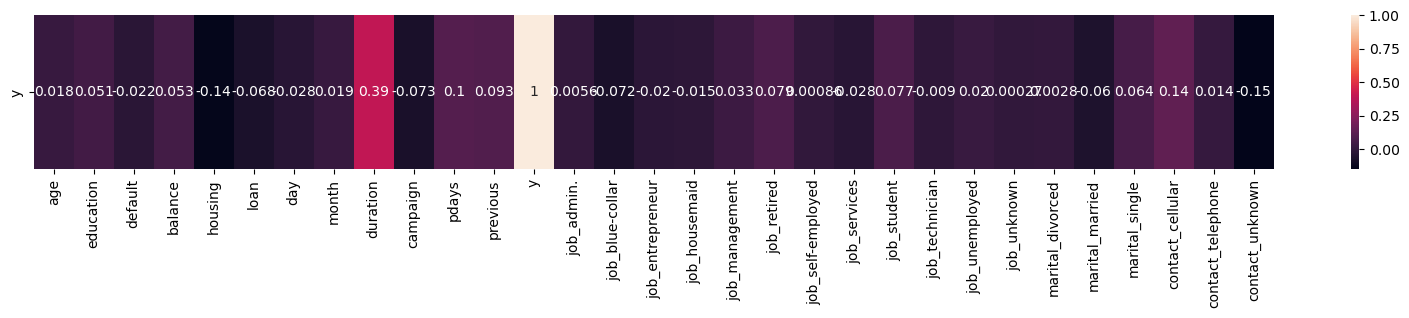

In [95]:
#1.Using Pearson corrleation
corr=df.corr().loc[['y']]
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

##### 1.2 Using Kendall corrleation

<AxesSubplot:>

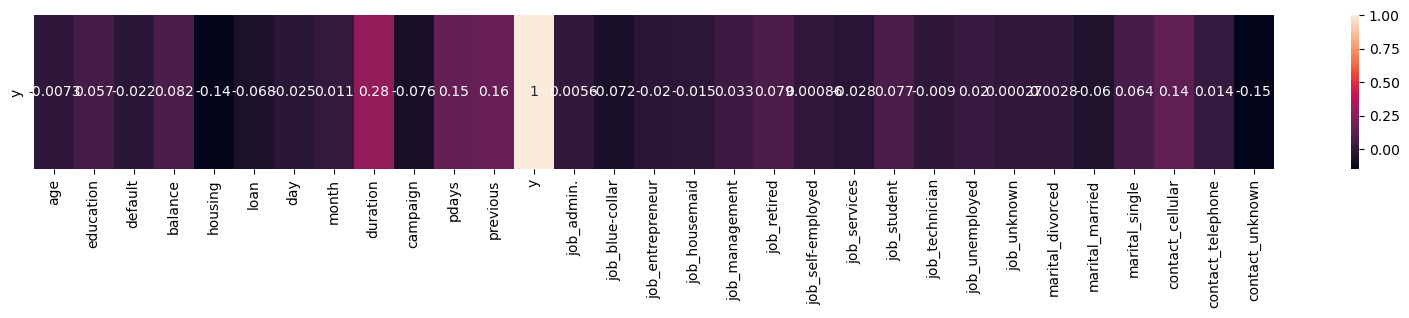

In [96]:
corr = df.corr(method='kendall').loc[['y']]
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

##### 1.3 varianceThreshold

In [97]:
x1 = df.drop(['y'], axis=1)
y1=df['y']

In [98]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold=0.0)
var_th.fit_transform(df)
print(var_th.get_feature_names_out(), len(var_th.get_feature_names_out()))

['age' 'education' 'default' 'balance' 'housing' 'loan' 'day' 'month'
 'duration' 'campaign' 'pdays' 'previous' 'y' 'job_admin.'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'job_unknown' 'marital_divorced'
 'marital_married' 'marital_single' 'contact_cellular' 'contact_telephone'
 'contact_unknown'] 31


In [99]:
df[var_th.get_feature_names_out()]

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,...,0,1,0,0,0,1,0,1,0,0
45207,70,1,0,1729,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
45208,70,2,0,5715,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


In [100]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [101]:
# It shows that there is no zero variance threshold.

##### 1.4 VIF(Variance Inflation Factor)

,VIF_Factor
job_housemaid,inf
job_management,inf
contact_telephone,inf
contact_cellular,inf
marital_single,inf
marital_married,inf
marital_divorced,inf
job_unknown,inf
job_unemployed,inf
job_technician,inf


 None


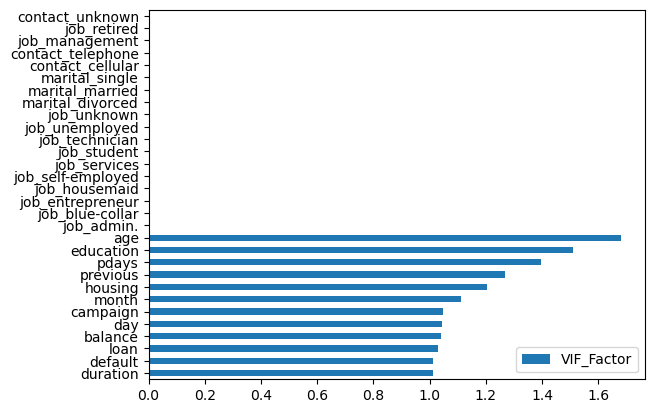

In [102]:
x2=df.drop(['y'], axis=1)

vif_factors_list=[]

for i in range(len(x2.columns)):
    vif=variance_inflation_factor(x2,i)
    vif_factors_list.append(vif)
    
vif_factors=pd.DataFrame(vif_factors_list, index=x2.columns, 
                         columns=['VIF_Factor']).sort_values(['VIF_Factor'],ascending=False)

print("",display(vif_factors))

vif_factors.sort_values(['VIF_Factor']).plot(kind = 'barh')
plt.show()


##### 1.5 Annova Test-(F-Test)

In [103]:
from sklearn.feature_selection import f_classif

In [104]:
x2 = df.drop("y", axis=1)
y2 = df['y']

In [105]:
f_val, p_val = f_classif(x2, y2)

df0 = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)}, index=x2.columns)
df0

,f_val,p_val
age,15.427156,0.00009
education,119.480549,0.00000
default,22.733923,0.00000
balance,126.572276,0.00000
housing,892.950576,0.00000
loan,211.167395,0.00000
day,36.359010,0.00000
month,15.843506,0.00007
duration,8333.761148,0.00000
campaign,243.358404,0.00000


###### 1.6 information Gain

In [106]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [107]:
x2 = df.drop(['y'], axis=1)
y2 = df['y']

<AxesSubplot:>

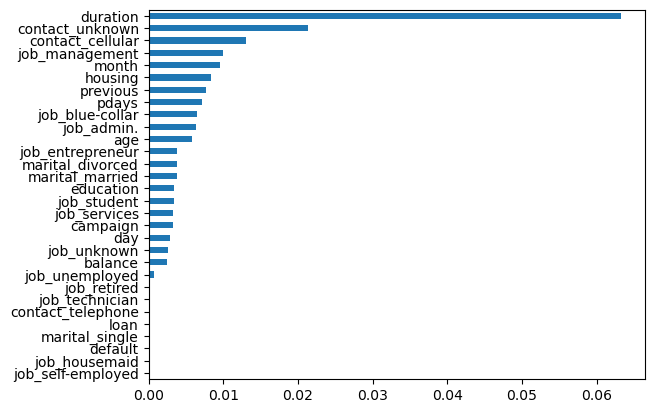

In [108]:
array1 = mutual_info_regression(x2,y2)

s2 = pd.Series(array1, index=x2.columns)
s2.sort_values().plot(kind = 'barh')

#### 2. Wrapper Method

##### 2.1 Bi-directional Feature Selection

In [109]:
# pip install mlxtend

In [110]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [111]:
f1= ['education', 'duration', 'job_technician', 'marital_divorced', 'marital_single']

In [112]:
f2= ['education', 'balance', 'loan', 'duration', 'campaign', 'job_admin.', 'job_blue-collar', 'job_housemaid',
     'job_management', 'job_technician', 'job_unknown', 'marital_married', 'contact_cellular', 'contact_unknown']

In [113]:
f3= ['age', 'job_self-employed']

In [114]:
f4= ['age', 'education', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous',
     'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'marital_married', 'contact_unknown']

In [115]:
f5= ['duration']

In [116]:
f6= ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
     'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
     'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'contact_unknown']

In [117]:
f7= ['duration']

In [118]:
f8= ['age', 'education', 'default', 'balance', 'duration', 'job_admin.', 'job_retired', 'job_self-employed',
     'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married']

In [119]:
f9= ['default', 'duration', 'job_self-employed', 'job_unknown', 'marital_divorced']

In [120]:
f10= ['education', 'default', 'balance', 'housing', 'loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
      'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_technician',
      'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_unknown']

# Step 6: Model Building & Evaluation

# [1] Logistic Regression

##### Train Test spliting of data

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x[f1], y, test_size=0.25, random_state=10, stratify=y)
x_train

,education,duration,job_technician,marital_divorced,marital_single
9483,3,300,0,0,0
26912,3,37,0,0,1
21753,0,160,0,0,0
28260,3,86,0,0,0
19216,2,113,0,0,0
...,...,...,...,...,...
11271,3,89,0,1,0
2397,1,295,0,0,0
227,3,27,0,0,1
2433,3,107,1,0,0


In [122]:
#Model fitting
# Create an instance

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [123]:
# Training Accuracy
y_pred_train = log_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy_train_log = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy_train_log)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[29521   420]
 [ 3330   637]]
*********************************************
Accuracy:  0.8894066297039047
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     29941
           1       0.60      0.16      0.25      3967

    accuracy                           0.89     33908
   macro avg       0.75      0.57      0.60     33908
weighted avg       0.86      0.89      0.86     33908



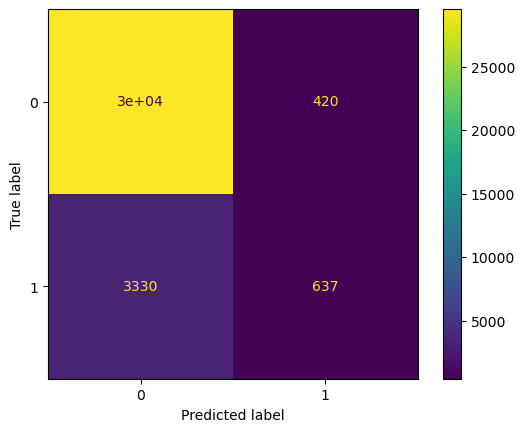

In [124]:
plot_confusion_matrix(log_model, x_train, y_train)

In [125]:
# testing Accuracy
y_pred = log_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

# visualization also

accuracy_test_log = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy_test_log)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[9842  139]
 [1115  207]]
*********************************************
Accuracy:  0.8890560028311068
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9981
           1       0.60      0.16      0.25      1322

    accuracy                           0.89     11303
   macro avg       0.75      0.57      0.59     11303
weighted avg       0.86      0.89      0.86     11303



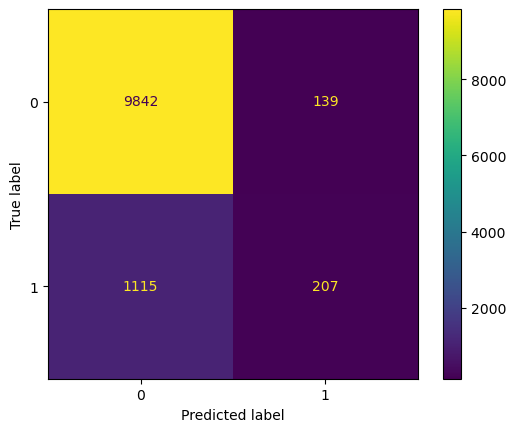

In [126]:
plot_confusion_matrix(log_model, x_test, y_test)

In [127]:
y_pred_prob = log_model.predict_proba(x_test)
y_pred_prob

array([[0.82721053, 0.17278947],
       [0.96720405, 0.03279595],
       [0.89732408, 0.10267592],
       ...,
       [0.93518378, 0.06481622],
       [0.92644556, 0.07355444],
       [0.86988269, 0.13011731]])

In [128]:
#AUC-ROC Curve for logistic Regression

In [129]:
y_pred_prob = log_model.predict_proba(x_train)   # Plot AUC- ROC curve on Training data
y_pred_prob[:,1]


fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])


Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

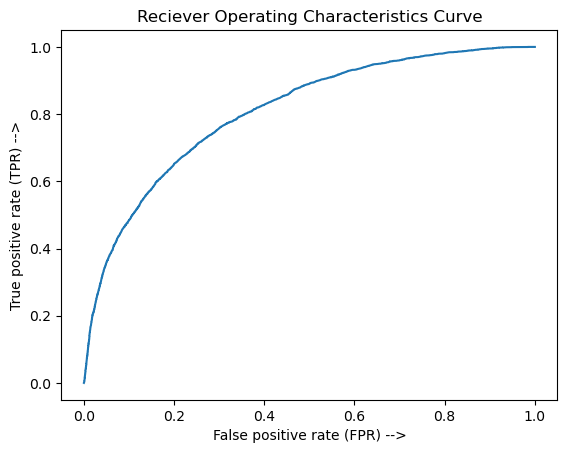

In [130]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [131]:
auc_value = auc(fpr, tpr)
auc_value

0.8076746254020606

In [132]:
threshold = [0.5, 0.6, 0.7, 0.8,0.9]

df1 = pd.DataFrame()

for i in  threshold:
    preds = (log_model.predict_proba(x_test)[:,1] > i).astype(int)

    df2 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df3 = pd.concat([df1,df2], axis = 1)
    
df3.columns
df3

,0
Accuracy,0.884898
recall,0.027231
Precision,0.705882
F1-Score,0.052440


### Results of logistic regression

In [133]:
results_log=pd.DataFrame(
{'Model':['Logistic Regression Model'],
 'Accuracy (Train)':[accuracy_train_log],
 'Accuracy (Test)':[accuracy_test_log],
})
display(results_log)

,Model,Accuracy (Train),Accuracy (Test)
0,Logistic Regression Model,0.889407,0.889056


# [2] K-Nearest Neighbour 

## 1) Standardization

##### Train Test spliting of data

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25, random_state=10, stratify=y)
x_train

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
9483,0.687622,1.206484,0,-0.447419,1,0,-1.178318,-0.060073,0.162458,0.721811,...,0,0,0,0,0,1,0,0,0,1
26912,-0.950215,1.206484,0,1.421711,1,0,0.624050,2.016333,-0.858802,-0.246560,...,0,0,0,0,0,0,1,1,0,0
21753,1.169339,-2.646114,0,-0.447419,0,0,0.383734,0.770490,-0.381179,0.076230,...,0,0,0,0,0,1,0,1,0,0
28260,-0.468498,1.206484,0,-0.447419,1,0,1.585313,-2.136478,-0.668530,-0.569351,...,0,0,0,0,0,1,0,1,0,0
19216,1.458369,-0.077715,0,-0.447419,0,0,-1.178318,0.770490,-0.563685,0.076230,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,0.398592,1.206484,0,-0.375163,1,0,0.263576,-0.060073,-0.656880,0.399020,...,0,0,0,0,1,0,0,0,0,1
2397,0.591279,-1.361914,1,-0.451689,0,0,-0.337213,-0.475354,0.143042,-0.569351,...,0,0,0,0,0,1,0,0,0,1
227,-0.757528,1.206484,0,-0.436253,1,0,-1.298476,-0.475354,-0.897634,-0.569351,...,0,0,0,0,0,0,1,0,0,1
2433,-1.431932,1.206484,0,0.808849,1,0,-0.337213,-0.475354,-0.586984,-0.569351,...,0,1,0,0,0,1,0,0,0,1


In [135]:
# create an instance of model

knn_std = KNeighborsClassifier()
knn_std.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
# Training Data

y_pred_train = knn_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_knn_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_knn_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29346   595]
 [ 2120  1847]]
************************************************************
Accuracy is --> 0.919930399905627
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     29941
           1       0.76      0.47      0.58      3967

    accuracy                           0.92     33908
   macro avg       0.84      0.72      0.77     33908
weighted avg       0.91      0.92      0.91     33908



In [137]:
# Testing Data

y_pred = knn_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_knn_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_knn_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9646  335]
 [ 907  415]]
************************************************************
Accuracy is --> 0.8901176678757852
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9981
           1       0.55      0.31      0.40      1322

    accuracy                           0.89     11303
   macro avg       0.73      0.64      0.67     11303
weighted avg       0.87      0.89      0.88     11303



# Hyperparameter Tunning

In [138]:
param_grid = {"n_neighbors" : np.arange(3,15),
                  "p": [1,2]} # Param_grid

gscv_knn_std = GridSearchCV(knn_std, param_grid, cv=7, n_jobs=-1)

gscv_knn_std.fit(x_train, y_train) 

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

In [139]:
gscv_knn_std.best_params_

{'n_neighbors': 13, 'p': 2}

In [140]:
# Training Data

y_pred_train = gscv_knn_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_gscv_knn_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_gscv_knn_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29419   522]
 [ 2723  1244]]
************************************************************
Accuracy is --> 0.9042998702371122
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     29941
           1       0.70      0.31      0.43      3967

    accuracy                           0.90     33908
   macro avg       0.81      0.65      0.69     33908
weighted avg       0.89      0.90      0.89     33908



In [141]:
# Testing Accuracy

y_pred = gscv_knn_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_gscv_knn_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_gscv_knn_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9757  224]
 [ 984  338]]
************************************************************
Accuracy is --> 0.8931257188357073
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.60      0.26      0.36      1322

    accuracy                           0.89     11303
   macro avg       0.75      0.62      0.65     11303
weighted avg       0.87      0.89      0.87     11303



## 2) Normalization

##### Train Test spliting of data

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=10, stratify=y)
x_train

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
9483,0.687622,1.206484,0,-0.447419,1,0,-1.178318,-0.060073,0.162458,0.721811,...,0,0,0,0,0,1,0,0,0,1
26912,-0.950215,1.206484,0,1.421711,1,0,0.624050,2.016333,-0.858802,-0.246560,...,0,0,0,0,0,0,1,1,0,0
21753,1.169339,-2.646114,0,-0.447419,0,0,0.383734,0.770490,-0.381179,0.076230,...,0,0,0,0,0,1,0,1,0,0
28260,-0.468498,1.206484,0,-0.447419,1,0,1.585313,-2.136478,-0.668530,-0.569351,...,0,0,0,0,0,1,0,1,0,0
19216,1.458369,-0.077715,0,-0.447419,0,0,-1.178318,0.770490,-0.563685,0.076230,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,0.398592,1.206484,0,-0.375163,1,0,0.263576,-0.060073,-0.656880,0.399020,...,0,0,0,0,1,0,0,0,0,1
2397,0.591279,-1.361914,1,-0.451689,0,0,-0.337213,-0.475354,0.143042,-0.569351,...,0,0,0,0,0,1,0,0,0,1
227,-0.757528,1.206484,0,-0.436253,1,0,-1.298476,-0.475354,-0.897634,-0.569351,...,0,0,0,0,0,0,1,0,0,1
2433,-1.431932,1.206484,0,0.808849,1,0,-0.337213,-0.475354,-0.586984,-0.569351,...,0,1,0,0,0,1,0,0,0,1


In [143]:
# create an instance of model

knn_norm = KNeighborsClassifier()
knn_norm.fit(x_train, y_train)

KNeighborsClassifier()

In [144]:
# Training Data

y_pred_train = knn_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_knn_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_knn_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29346   595]
 [ 2120  1847]]
************************************************************
Accuracy is --> 0.919930399905627
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     29941
           1       0.76      0.47      0.58      3967

    accuracy                           0.92     33908
   macro avg       0.84      0.72      0.77     33908
weighted avg       0.91      0.92      0.91     33908



In [145]:
# Testing Data

y_pred = knn_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_knn_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_knn_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9646  335]
 [ 907  415]]
************************************************************
Accuracy is --> 0.8901176678757852
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9981
           1       0.55      0.31      0.40      1322

    accuracy                           0.89     11303
   macro avg       0.73      0.64      0.67     11303
weighted avg       0.87      0.89      0.88     11303



# Hyperparameter Tunning

In [146]:
param_grid = {"n_neighbors" : np.arange(3,15),
                  "p": [1,2]} # Param_grid

gscv_knn_norm = GridSearchCV(knn_norm, param_grid, cv=7, n_jobs=-1)

gscv_knn_norm.fit(x_train, y_train) 

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

In [147]:
gscv_knn_norm.best_params_

{'n_neighbors': 13, 'p': 2}

In [148]:
# Training Data

y_pred_train = gscv_knn_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_gscv_knn_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_gscv_knn_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29419   522]
 [ 2723  1244]]
************************************************************
Accuracy is --> 0.9042998702371122
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     29941
           1       0.70      0.31      0.43      3967

    accuracy                           0.90     33908
   macro avg       0.81      0.65      0.69     33908
weighted avg       0.89      0.90      0.89     33908



In [149]:
# Testing Accuracy

y_pred = gscv_knn_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_gscv_knn_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_gscv_knn_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9757  224]
 [ 984  338]]
************************************************************
Accuracy is --> 0.8931257188357073
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.60      0.26      0.36      1322

    accuracy                           0.89     11303
   macro avg       0.75      0.62      0.65     11303
weighted avg       0.87      0.89      0.87     11303



### Results of knn

In [150]:
results_knn=pd.DataFrame(
{'Model':['Standardize KNN','Normalized KNN', 'GSCV STD KNN', 'GSCV Normal KNN' ],
 'Accuracy (Train)':[accurracy_train_knn_std,accurracy_train_knn_norm,accurracy_train_gscv_knn_std,accurracy_train_gscv_knn_norm],
 'Accuracy (Test)':[accurracy_test_knn_std, accurracy_test_knn_norm,accurracy_test_gscv_knn_std,accurracy_test_gscv_knn_norm],
})
display(results_knn)

,Model,Accuracy (Train),Accuracy (Test)
0,Standardize KNN,0.91993,0.890118
1,Normalized KNN,0.91993,0.890118
2,GSCV STD KNN,0.90430,0.893126
3,GSCV Normal KNN,0.90430,0.893126


# [3] Decision Tree Algorithm

###  Spliting the Dataset

In [151]:
x=df.drop(['y'], axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [152]:
# creating instance & model fitting
dt_model=DecisionTreeClassifier(random_state=12)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

### Model Evaluation of DT Regression

In [153]:
# Evaluation of Training Data
y_pred_train=dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_dt = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_dt)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29928     0]
 [    0  3980]]
************************************************************
Accuracy is --> 1.0
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29928
           1       1.00      1.00      1.00      3980

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908



In [154]:
# In DT training model is always overfitted.

In [155]:
# Evaluation of Testing Data
y_pred_test=dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_dt = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_dt)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



In [156]:
# plt.figure(figsize=(250, 250))
# plot_tree(dt_model, feature_names=x.columns, filled=True, rounded=True, precision=3)
# print()
# plt.show()
# plt.savefig("Decision Tree.png")

## Prunning Technique

## 1. Hyperparameter Tunning (Pre-Prunning)

### RandomizedSearchCV 

In [157]:
import time
t1 = time.time()

# Defined param_grid
param_grid = {"criterion":["gini", "entropy"], 
              "max_depth": np.arange(3,10),
              "min_samples_split": np.arange(1,15),
              "min_samples_leaf": np.arange(2,15),
             }                                          

# Create Instance & Model Fitting
rscv_dt = RandomizedSearchCV(dt_model, param_grid, cv=7, n_jobs=-1)
rscv_dt.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 1.9727790355682373 sec


In [158]:
# best parameters from gridsearchcv
rscv_dt.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 9,
 'criterion': 'gini'}

#### Model Evaluation of GridSearchCV Ridge Regression 

In [159]:
# Evaluation of Training Data
y_pred_train=rscv_dt.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rscv_dt = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rscv_dt)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[28959   969]
 [ 1805  2175]]
************************************************************
Accuracy is --> 0.9181903975463017
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     29928
           1       0.69      0.55      0.61      3980

    accuracy                           0.92     33908
   macro avg       0.82      0.76      0.78     33908
weighted avg       0.91      0.92      0.91     33908



In [160]:
# Evaluation of Testing Data
y_pred_test=rscv_dt.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rscv_dt = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rscv_dt)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



## 2. Post-Prunning: Cost Complexity Prunning

In [161]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 1.46175585e-05, 1.46681733e-05, ...,
       4.10610544e-03, 6.34292943e-03, 2.51011028e-02])

In [162]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeClassifier(ccp_alpha=i, random_state=12)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)

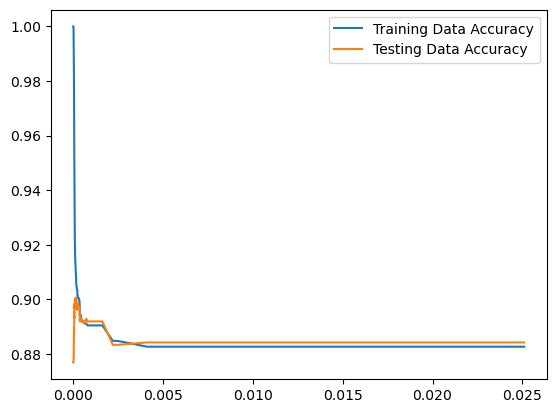

In [163]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()
plt.show()

In [164]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

1146

In [165]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

0.00016088535933624602

In [166]:
# Here ccp alpha is 0 so there is no need of evaluation

### Feature Selection Techniques

In [167]:
array = dt_model.feature_importances_
array

array([0.09769767, 0.02072872, 0.0019075 , 0.0997418 , 0.04317841,
       0.01060054, 0.10101758, 0.08867515, 0.29070494, 0.03674268,
       0.08052519, 0.01554249, 0.01061562, 0.00734209, 0.00361606,
       0.00193245, 0.01006967, 0.0035491 , 0.0040373 , 0.00518929,
       0.00457639, 0.00920722, 0.00415393, 0.00231881, 0.00650143,
       0.0079133 , 0.0084816 , 0.00652859, 0.004505  , 0.01239947])

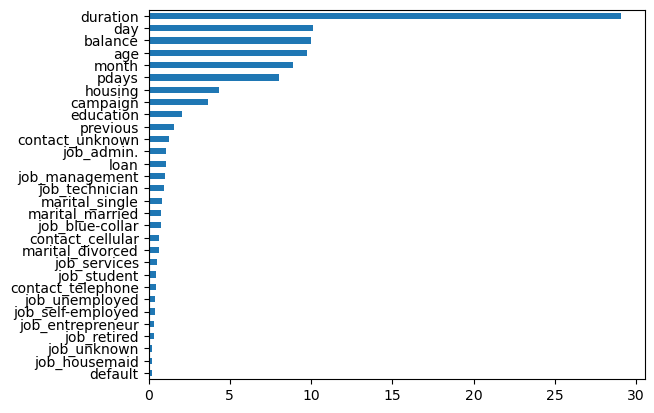

In [169]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [170]:
results_dt=pd.DataFrame(
{'Model':['Regular DT Model','rscv DT Model'],
 'Accuracy (Train)':[accurracy_train_dt, accurracy_train_rscv_dt],
 'Accuracy (Test)':[accurracy_test_dt, accurracy_test_rscv_dt],
})
display(results_dt)

,Model,Accuracy (Train),Accuracy (Test)
0,Regular DT Model,1.00000,0.847386
1,rscv DT Model,0.91819,0.847386


# [4] Random Forest Algorithm

###  Spliting the Dataset

In [171]:
x=df.drop(['y'], axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [172]:
# creating instance & model fitting
rf=RandomForestClassifier(random_state=12)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=12)

### Model Evaluation of DT Regression

In [173]:
# Evaluation of Training Data
y_pred_train=rf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rf = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rf)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29928     0]
 [    0  3980]]
************************************************************
Accuracy is --> 1.0
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29928
           1       1.00      1.00      1.00      3980

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908



In [174]:
# Evaluation of Testing Data
y_pred_test=rf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rf = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rf)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



In [175]:
rf.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=1916507803)

In [176]:
# plt.figure(figsize=(250, 250))
# plot_tree(rf.estimators_[1], feature_names=x[f7].columns, filled=True, rounded=True, precision=3)
# print()
# plt.show()
# plt.savefig("Random Forest.png")

## Prunning Technique

## Hyperparameter Tunning (Pre-Prunning)

### RandomizedSearchCV 

In [177]:
import time
t1 = time.time()

# Defined param_grid

param_grid = {"n_estimators" : np.arange(10,200),
                 "criterion":["gini", "entropy"], 
                 "max_depth": np.arange(3,10),
                 "min_samples_split": np.arange(1,15),
                 "min_samples_leaf": np.arange(2,15), 
                 "max_features": ['sqrt', 'log2'],
             } 

# Create Instance & Model Fitting
rscv_rf = RandomizedSearchCV(rf, param_grid, cv=7, n_jobs=-1)
rscv_rf.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 42.364328384399414 sec


In [178]:
# best parameters from gridsearchcv
rscv_rf.best_params_

{'n_estimators': 53,
 'min_samples_split': 3,
 'min_samples_leaf': 9,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy'}

#### Model Evaluation of GridSearchCV Ridge Regression 

In [179]:
# Evaluation of Training Data
y_pred_train=rscv_rf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rscv_rf = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rscv_rf)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29822   106]
 [ 3533   447]]
************************************************************
Accuracy is --> 0.8926801934646691
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     29928
           1       0.81      0.11      0.20      3980

    accuracy                           0.89     33908
   macro avg       0.85      0.55      0.57     33908
weighted avg       0.88      0.89      0.86     33908



In [180]:
# Evaluation of Testing Data
y_pred_test=rscv_rf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rscv_rf = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rscv_rf)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



### Feature Selection Techniques

In [181]:
array = rf.feature_importances_
array

array([0.0998598 , 0.02745399, 0.00210335, 0.10769908, 0.02818275,
       0.01107155, 0.09881805, 0.08626791, 0.28222038, 0.04155644,
       0.06011379, 0.02857155, 0.00946123, 0.00919406, 0.00377967,
       0.00346871, 0.01082335, 0.00574581, 0.00456057, 0.00641887,
       0.00475983, 0.01051142, 0.00470304, 0.00162666, 0.0074277 ,
       0.01072176, 0.00938616, 0.01058677, 0.00440299, 0.00850277])

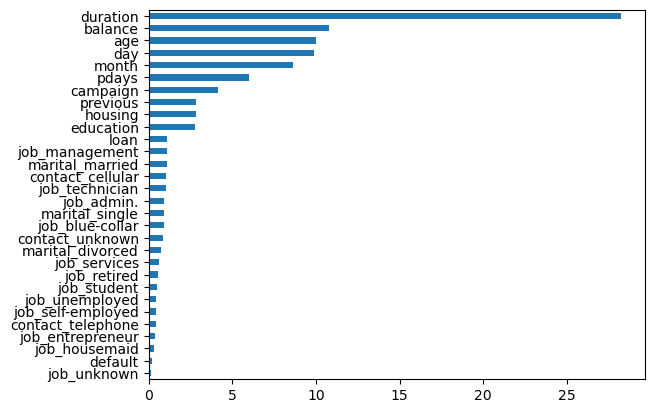

In [183]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [184]:
results_rf=pd.DataFrame(
{'Model':['Regular RF Model','rscv rf Model'],
 'Accuracy (Train)':[accurracy_train_rf, accurracy_train_rscv_rf],
 'Accuracy (Test)':[accurracy_test_rf, accurracy_test_rscv_rf],
})
display(results_rf)

,Model,Accuracy (Train),Accuracy (Test)
0,Regular RF Model,1.00000,0.847386
1,rscv rf Model,0.89268,0.847386


# [5] Ada Boost Algorithm

###  Spliting the Dataset

In [185]:
x=df.drop(['y'], axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [186]:
# creating instance & model fitting
ada=AdaBoostClassifier(random_state=12)

ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=12)

### Model Evaluation of DT Regression

In [187]:
# Evaluation of Training Data
y_pred_train=ada.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_ada = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_ada)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[28993   935]
 [ 2669  1311]]
************************************************************
Accuracy is --> 0.8937123982540993
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     29928
           1       0.58      0.33      0.42      3980

    accuracy                           0.89     33908
   macro avg       0.75      0.65      0.68     33908
weighted avg       0.88      0.89      0.88     33908



In [188]:
# Evaluation of Testing Data
y_pred_test=ada.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_ada = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_ada)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



In [189]:
ada.estimators_[1]

DecisionTreeClassifier(max_depth=1, random_state=1916507803)

In [190]:
# plt.figure(figsize=(250, 250))
# plot_tree(ada.estimators_[1], feature_names=x[f9].columns, filled=True, rounded=True, precision=3)
# print()
# plt.show()
# plt.savefig("Ada Boost.png")

## Hyperparameter Tunning

### RandomizedSearchCV 

In [191]:
import time
t1 = time.time()

# Defined param_grid

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

# Create Instance & Model Fitting
rscv_ada = RandomizedSearchCV(ada, param_grid, cv=7, n_jobs=-1)
rscv_ada.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 81.17752504348755 sec


In [192]:
# best parameters from gridsearchcv
rscv_ada.best_params_

{'n_estimators': 198, 'learning_rate': 1.862}

#### Model Evaluation of GridSearchCV Ridge Regression 

In [193]:
# Evaluation of Training Data
y_pred_train=rscv_ada.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rscv_ada = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rscv_ada)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[28910  1018]
 [ 2438  1542]]
************************************************************
Accuracy is --> 0.8980771499351186
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     29928
           1       0.60      0.39      0.47      3980

    accuracy                           0.90     33908
   macro avg       0.76      0.68      0.71     33908
weighted avg       0.88      0.90      0.89     33908



In [194]:
# Evaluation of Testing Data
y_pred_test=rscv_ada.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rscv_ada = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rscv_ada)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9505  489]
 [1236   73]]
************************************************************
Accuracy is --> 0.8473856498274794
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9994
           1       0.13      0.06      0.08      1309

    accuracy                           0.85     11303
   macro avg       0.51      0.50      0.50     11303
weighted avg       0.80      0.85      0.82     11303



### Feature Selection Techniques

In [195]:
array = ada.feature_importances_
array

array([0.04, 0.02, 0.  , 0.02, 0.02, 0.04, 0.1 , 0.22, 0.24, 0.02, 0.18,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.04])

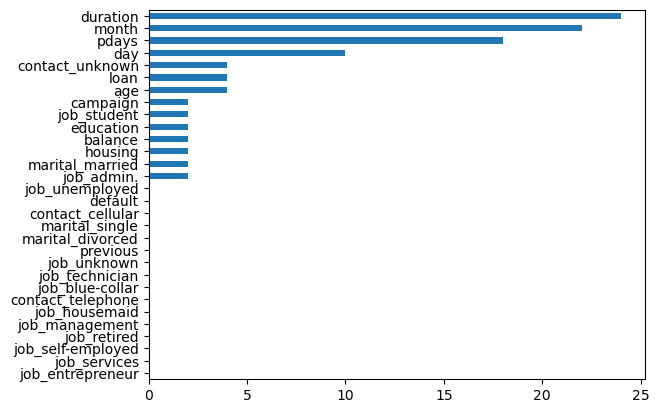

In [197]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [198]:
results_ada=pd.DataFrame(
{'Model':['Ada Boost Model','rscv ada Model'],
 'Accuracy (Train)':[accurracy_train_ada, accurracy_train_rscv_ada],
 'Accuracy (Test)':[accurracy_test_ada, accurracy_test_rscv_ada],
})
display(results_ada)

,Model,Accuracy (Train),Accuracy (Test)
0,Ada Boost Model,0.893712,0.847386
1,rscv ada Model,0.898077,0.847386


# [6] Support Vector Machine Algorithm

###  Spliting the Dataset

In [199]:
x=df.drop(['y'], axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12, stratify=y)

In [200]:
# creating instance & model fitting
svc=SVC()

svc.fit(x_train, y_train)

SVC()

### Model Evaluation

In [201]:
# Evaluation of Training Data
y_pred_train=svc.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29907    34]
 [ 3908    59]]
************************************************************
Accuracy is --> 0.8837442491447446
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     29941
           1       0.63      0.01      0.03      3967

    accuracy                           0.88     33908
   macro avg       0.76      0.51      0.48     33908
weighted avg       0.86      0.88      0.83     33908



In [202]:
# Evaluation of Testing Data
y_pred_test=svc.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9481  500]
 [1260   62]]
************************************************************
Accuracy is --> 0.8442891267805007
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9981
           1       0.11      0.05      0.07      1322

    accuracy                           0.84     11303
   macro avg       0.50      0.50      0.49     11303
weighted avg       0.79      0.84      0.82     11303



## 1) Standardization

###  Spliting the Dataset

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y, test_size=0.25, random_state=12, stratify=y)

In [204]:
# creating instance & model fitting
svc_std=SVC()

svc_std.fit(x_train, y_train)

SVC()

### Model Evaluation

In [205]:
# Evaluation of Training Data
y_pred_train=svc_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29557   384]
 [ 2826  1141]]
************************************************************
Accuracy is --> 0.9053320750265424
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29941
           1       0.75      0.29      0.42      3967

    accuracy                           0.91     33908
   macro avg       0.83      0.64      0.68     33908
weighted avg       0.89      0.91      0.89     33908



In [206]:
# Evaluation of Testing Data
y_pred_test=svc_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9481  500]
 [1260   62]]
************************************************************
Accuracy is --> 0.8442891267805007
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9981
           1       0.11      0.05      0.07      1322

    accuracy                           0.84     11303
   macro avg       0.50      0.50      0.49     11303
weighted avg       0.79      0.84      0.82     11303



## 2) Normalization

###  Spliting the Dataset

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y, test_size=0.25, random_state=12, stratify=y)

In [208]:
# creating instance & model fitting
svc_norm=SVC()

svc_norm.fit(x_train, y_train)

SVC()

### Model Evaluation

In [209]:
# Evaluation of Training Data
y_pred_train=svc_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[29557   384]
 [ 2826  1141]]
************************************************************
Accuracy is --> 0.9053320750265424
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29941
           1       0.75      0.29      0.42      3967

    accuracy                           0.91     33908
   macro avg       0.83      0.64      0.68     33908
weighted avg       0.89      0.91      0.89     33908



In [210]:
# Evaluation of Testing Data
y_pred_test=svc_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[9481  500]
 [1260   62]]
************************************************************
Accuracy is --> 0.8442891267805007
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      9981
           1       0.11      0.05      0.07      1322

    accuracy                           0.84     11303
   macro avg       0.50      0.50      0.49     11303
weighted avg       0.79      0.84      0.82     11303



# Results

In [212]:
results_svc=pd.DataFrame(
{'Model':['SVM Model', 'SVM Std', 'SVM Normal'],
 'Accuracy (Train)':[accurracy_train_svc, accurracy_train_svc_std, accurracy_train_svc_norm],
 'Accuracy (Test)':[accurracy_test_svc, accurracy_test_svc_std, accurracy_test_svc_norm],
})
display(results_svc)

,Model,Accuracy (Train),Accuracy (Test)
0,SVM Model,0.883744,0.844289
1,SVM Std,0.905332,0.844289
2,SVM Normal,0.905332,0.844289


# Comparison of Results

In [213]:
result=pd.concat([results_log,results_knn,results_dt,results_rf,results_ada, results_svc],axis=0,ignore_index=True)
result['% Diff.']=(result['Accuracy (Train)']-result['Accuracy (Test)'])*100
result

,Model,Accuracy (Train),Accuracy (Test),% Diff.
0,Logistic Regression Model,0.889407,0.889056,0.035063
1,Standardize KNN,0.919930,0.890118,2.981273
2,Normalized KNN,0.919930,0.890118,2.981273
3,GSCV STD KNN,0.904300,0.893126,1.117415
4,GSCV Normal KNN,0.904300,0.893126,1.117415
5,Regular DT Model,1.000000,0.847386,15.261435
6,rscv DT Model,0.918190,0.847386,7.080475
7,Regular RF Model,1.000000,0.847386,15.261435
8,rscv rf Model,0.892680,0.847386,4.529454
9,Ada Boost Model,0.893712,0.847386,4.632675


In [ ]:
# From above comparison KNN model gives best acuracy with less variance

### Storring the feature names, label encoded values in JSON file

In [286]:
feature_names = x.columns       # selected features from feature selection
best_features = x.columns
scale_features

housing_value={'yes':1,'no':0}
loan_value={'yes':1,'no':0}
month_value={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
def_value={'yes':1,'no':0}
edu_value={'primary':1,'secondary':2,'tertiary':3,'unknown':0}
target_value={'yes':1,'no':0}

json_data = {"housing":housing_value, 
             "loan":loan_value,
             'month':month_value,
             'default':def_value,
             'education':edu_value,
             'target':target_value,
             "columns":list(feature_names),
             'best_features':list(best_features),
             'scale_features':scale_features}

with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

### Storring fitted model in pickle file

In [287]:
#fitted model
with open("model.pkl", "wb") as f:
    pickle.dump(knn_std, f)
    
#fitted related Standardize scalling term
with open("StandardScaler.pkl", "wb") as f:
    pickle.dump(std_scaler, f)

#fitted related Normalize scalling term
with open("MinMaxScaler.pkl", "wb") as f:
    pickle.dump(norm_scaler, f)

### loading models

In [288]:
with open("Project_data.json", "r") as f:
    json_data=json.load(f)

#fitted model
with open("model.pkl", "rb") as f:
    model=pickle.load(f)

#fitted related Standardize scalling term
with open("StandardScaler.pkl", "rb") as f:
    StandardScaler=pickle.load(f)
    
#fitted related Normalize scalling term
with open("MinMaxScaler.pkl", "rb") as f:
    MinMaxScaler=pickle.load(f)

# Prediction on User entered value for testing

In [289]:
age=58
education='tertiary'
default='no'
balance=2143
housing='yes'
loan='no'
day=5
month='may'
duration=261
campaign=1
pdays=-1
previous=0
poutcome='unknown'
job='management'
marital='married'
contact='unknown'

# input for one-hot encodding
job = "job_" + job
marital = "marital_" + marital
contact = "contact_" + contact

### conversion for One-Hot Encoded values

In [290]:
# index of one-hot encodded columns
if job in list(json_data['best_features']): 
    job_index = json_data['columns'].index(job)
    
if marital in list(json_data['best_features']): 
    marital_index = json_data['columns'].index(marital)
    
if contact in list(json_data['best_features']): 
    contact_index = json_data['columns'].index(contact)

### conversion for label Encoded values

In [291]:
education=json_data['education'][education]
default=json_data['default'][default]
housing=json_data['housing'][housing]
loan=json_data['loan'][loan]
month=json_data['month'][month]

In [292]:
scale_features

['age',
 'education',
 'balance',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [293]:
# if KNN Model is used
# conversion of scaled variables
scale_features_values=[age,education,balance,day,month,duration,campaign,pdays,previous]

In [294]:
age=StandardScaler.transform([scale_features_values])[0][0]
education=StandardScaler.transform([scale_features_values])[0][1]
balance=StandardScaler.transform([scale_features_values])[0][2]
day=StandardScaler.transform([scale_features_values])[0][3]
month=StandardScaler.transform([scale_features_values])[0][4]
duration=StandardScaler.transform([scale_features_values])[0][5]
campaign=StandardScaler.transform([scale_features_values])[0][6]
pdays=StandardScaler.transform([scale_features_values])[0][7]
previous=StandardScaler.transform([scale_features_values])[0][8]

### Creating array of user input values

In [296]:
test_array = np.zeros(len(json_data['columns']))

# Note: put feature values in front of correct feature index # selected features from feature selection
test_array[0] = age
test_array[1] = education    #label encodded
test_array[2] = default     #label encodded
test_array[3] = balance
test_array[4] = housing     #label encodded
test_array[5] = loan     #label encodded
test_array[6] = day
test_array[7] = month     #label encodded
test_array[8] = duration
test_array[9] = campaign
test_array[10] = pdays
test_array[11] = previous

if job in list(json_data['best_features']):
    test_array[job_index] = 1   # one-hot encodded if present in feature list
    
if marital in list(json_data['best_features']):
    test_array[marital_index] = 1   # one-hot encodded if present in feature list
    
if contact in list(json_data['best_features']):
    test_array[contact_index] = 1   # one-hot encodded if present in feature list

test_array

array([ 1.65105532,  1.20648448,  0.        ,  0.25641925,  1.        ,
        0.        , -1.29847633, -0.47535364,  0.0110161 , -0.56935064,
       -0.41145311, -0.25194037,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [297]:
best_feature_indices=[]
for i in json_data['best_features']:
    m=json_data['columns'].index(i)
    best_feature_indices.append(m)
best_test_array = test_array[best_feature_indices]

## Prediction Output

In [298]:
prediction = model.predict([best_test_array])[0]

if prediction==1:
    print("Client would be subscribed the product (bank term deposit).")
else:
    print("Client would not be subscribed the product (bank term deposit).")

Client would not be subscribed the product (bank term deposit).
